# Multi-Objective Bayesian Optimization Tutorial

This notebook provides a comprehensive guide to understanding and using the high-performance multi-objective Bayesian optimization implementation.

## Table of Contents
1. [Introduction](#introduction)
2. [Theory Overview](#theory-overview)
3. [Implementation Features](#implementation-features)
4. [Basic Usage](#basic-usage)
5. [Advanced Configuration](#advanced-configuration)
6. [Visualization & Analysis](#visualization--analysis)
7. [Performance Tips](#performance-tips)

## Introduction

Bayesian Optimization (BO) is a powerful technique for optimizing expensive-to-evaluate functions. This implementation focuses on **multi-objective optimization** where we want to optimize multiple competing objectives simultaneously.

### Key Features:
- 🚀 **High Performance**: Numba-accelerated computations
- 🎯 **Multi-Objective**: Optimize multiple objectives simultaneously
- 📊 **Rich Visualization**: Interactive heatmaps and Pareto analysis
- 🔧 **Flexible**: Customizable hyperparameters and acquisition functions
- 📈 **Batch Optimization**: Evaluate multiple points per iteration

## Theory Overview

### Gaussian Process Regression
The core of Bayesian optimization is modeling the objective function(s) using Gaussian Processes (GPs):

$$f(x) \sim \mathcal{GP}(\mu(x), k(x, x'))$$

Where:
- $\mu(x)$ is the mean function (prior belief about function values)
- $k(x, x')$ is the kernel function (models similarity between points)

### RBF Kernel
We use the Radial Basis Function (RBF) kernel:

$$k(x, x') = \sigma^2 \exp\left(-\frac{||x - x'||^2}{2\ell^2}\right)$$

Where:
- $\sigma^2$ is the signal variance (`prior_variance`)
- $\ell$ is the length scale (`length_scales`)

### Multi-Objective Acquisition
We use Upper Confidence Bound (UCB) for each objective:

$$\text{UCB}(x) = \mu(x) + \beta \sigma(x)$$

The final acquisition function combines all objectives:

$$\text{Acquisition}(x) = \sum_{i=1}^{m} \text{UCB}_i(x)$$

## Implementation Features

### Core Components:

1. **Latin Hypercube Sampling (LHS)**: Efficient initial sampling
2. **Parallel Kernel Computation**: Fast GP operations with Numba
3. **Hyperparameter Optimization**: Automatic tuning via MLL maximization
4. **Batch Point Selection**: Evaluate multiple points per iteration
5. **Pareto Analysis**: Find optimal trade-offs between objectives

### Performance Optimizations:
- **Numba JIT compilation** for critical functions
- **Parallel kernel matrix computation**
- **Memory-efficient matrix operations**
- **Intelligent caching and reuse**

## Basic Usage

Let's start with a simple example using the built-in toy function:

In [6]:
# Import the module
import numpy as np
import time
from bayesian_optimization import BayesianOptimization, toy_function

# Set random seed for reproducibility
np.random.seed(42)

### Define the Optimization Problem

In [7]:
# Define bounds for the search space
X_MAX = 300
Y_MAX = 300

# Note: Upper bounds are EXCLUSIVE (300 means 0-299 inclusive)
bounds = [
    (0, X_MAX),  # x dimension: 0 to 299
    (0, Y_MAX),  # y dimension: 0 to 299
]

print("Toy function objectives:")
print("f1: Maximize near x=150")
print("f2: Maximize near y=150")
print("Optimal point should be around (150, 150)")

Toy function objectives:
f1: Maximize near x=150
f2: Maximize near y=150
Optimal point should be around (150, 150)


### Create and Run the Optimizer

In [8]:
# Create the Bayesian Optimization instance

optimizer = BayesianOptimization(
    function=toy_function,
    bounds=bounds,
    n_objectives=2,  # Two objectives
    initial_samples=(X_MAX + Y_MAX) // 40,  # 2.5% of grid size,
    n_iterations=5,     # Number of optimization iterations
    batch_size=(X_MAX // 80),  # 2.5% of grid size
    betas=np.array([2.0, 2.0]),  # Exploration parameters
)

print(f"Created optimizer with:")
print(f"- Search space: {bounds}")
print(f"- Total evaluations: {optimizer.total_samples}")
print(f"- Input space size: {len(optimizer.input_space)} points")

Created optimizer with:
- Search space: [(0, 300), (0, 300)]
- Total evaluations: 30
- Input space size: 90000 points


🚀 Starting optimization...

📊 Initializing static plot window (press 'Q' to close each plot)...
🚀 Starting optimization with 15 initial evaluations.
🔍 Debug: Initial point [184.  28.] | Objectives = [  88.44 -128.84]
🔍 Debug: Initial point [269. 102.] | Objectives = [-41.61  -3.04]
🔍 Debug: Initial point [296. 273.] | Objectives = [-113.16 -131.29]
🔍 Debug: Initial point [ 86. 238.] | Objectives = [ 59.04 -57.44]
🔍 Debug: Initial point [247. 210.] | Objectives = [  5.91 -16.  ]
🔍 Debug: Initial point [225. 290.] | Objectives = [  43.75 -176.  ]
🔍 Debug: Initial point [ 67. 178.] | Objectives = [31.11 12.16]
🔍 Debug: Initial point [ 21. 129.] | Objectives = [-66.41  15.59]
🔍 Debug: Initial point [202.  73.] | Objectives = [ 72.96 -39.29]
🔍 Debug: Initial point [128. 191.] | Objectives = [95.16  3.19]
🔍 Debug: Initial point [57. 83.] | Objectives = [ 13.51 -24.89]
🔍 Debug: Initial point [115.  40.] | Objectives = [  87.75 -101.  ]
🔍 Debug: Initial point [19. 12.] | Objectives = [ -71.61 

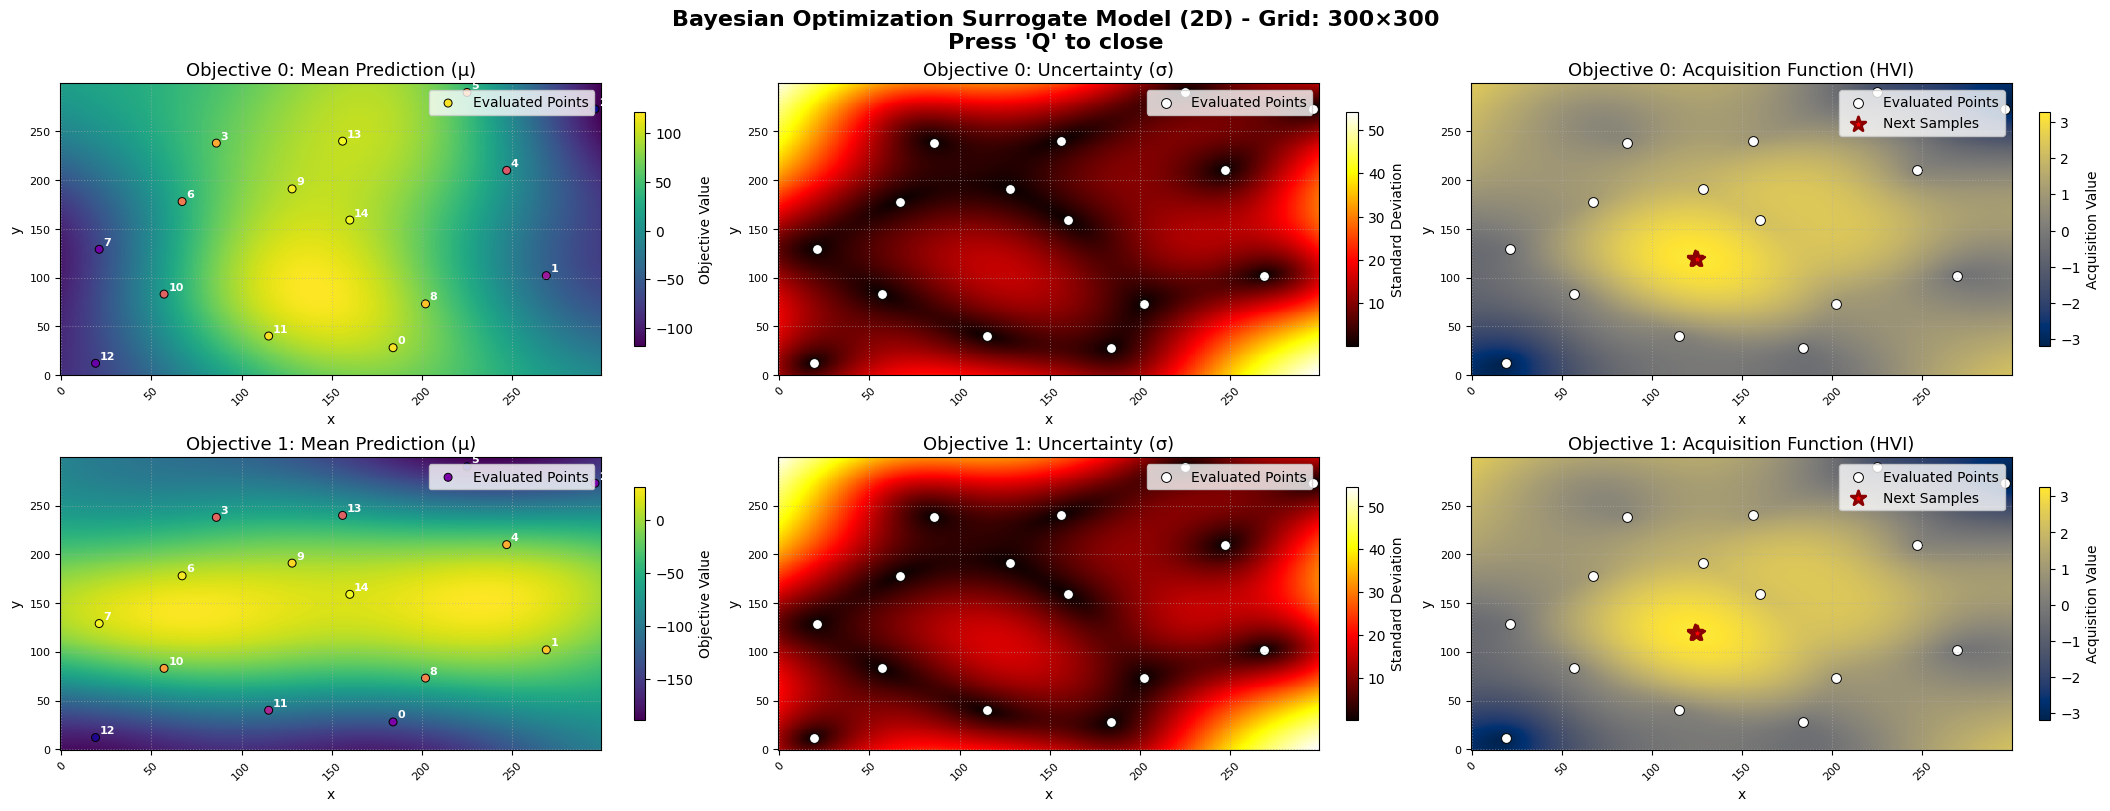

🔍 Debug: Evaluating point [124 119] | Objectives = [93.24 10.39]
🔍 Debug: Evaluating point [124 120] | Objectives = [93.24 11.  ]
🔍 Debug: Evaluating point [125 119] | Objectives = [93.75 10.39]
[Iter 15] Hyperparams: 0.0103s | Kernels: 0.0118s | Acquisition: 0.0168s | Eval: 0.7980s | TOTAL: 0.8369s

🔄 Debug: Starting iteration 18, n_evaluations=18
🔄 Debug: Optimized hyperparameters: [  83.81   87.37 4634.   4338.07]
🔍 Debug: Selected next batch:
 - [181 138]
 - [182 138]
 - [180 138]


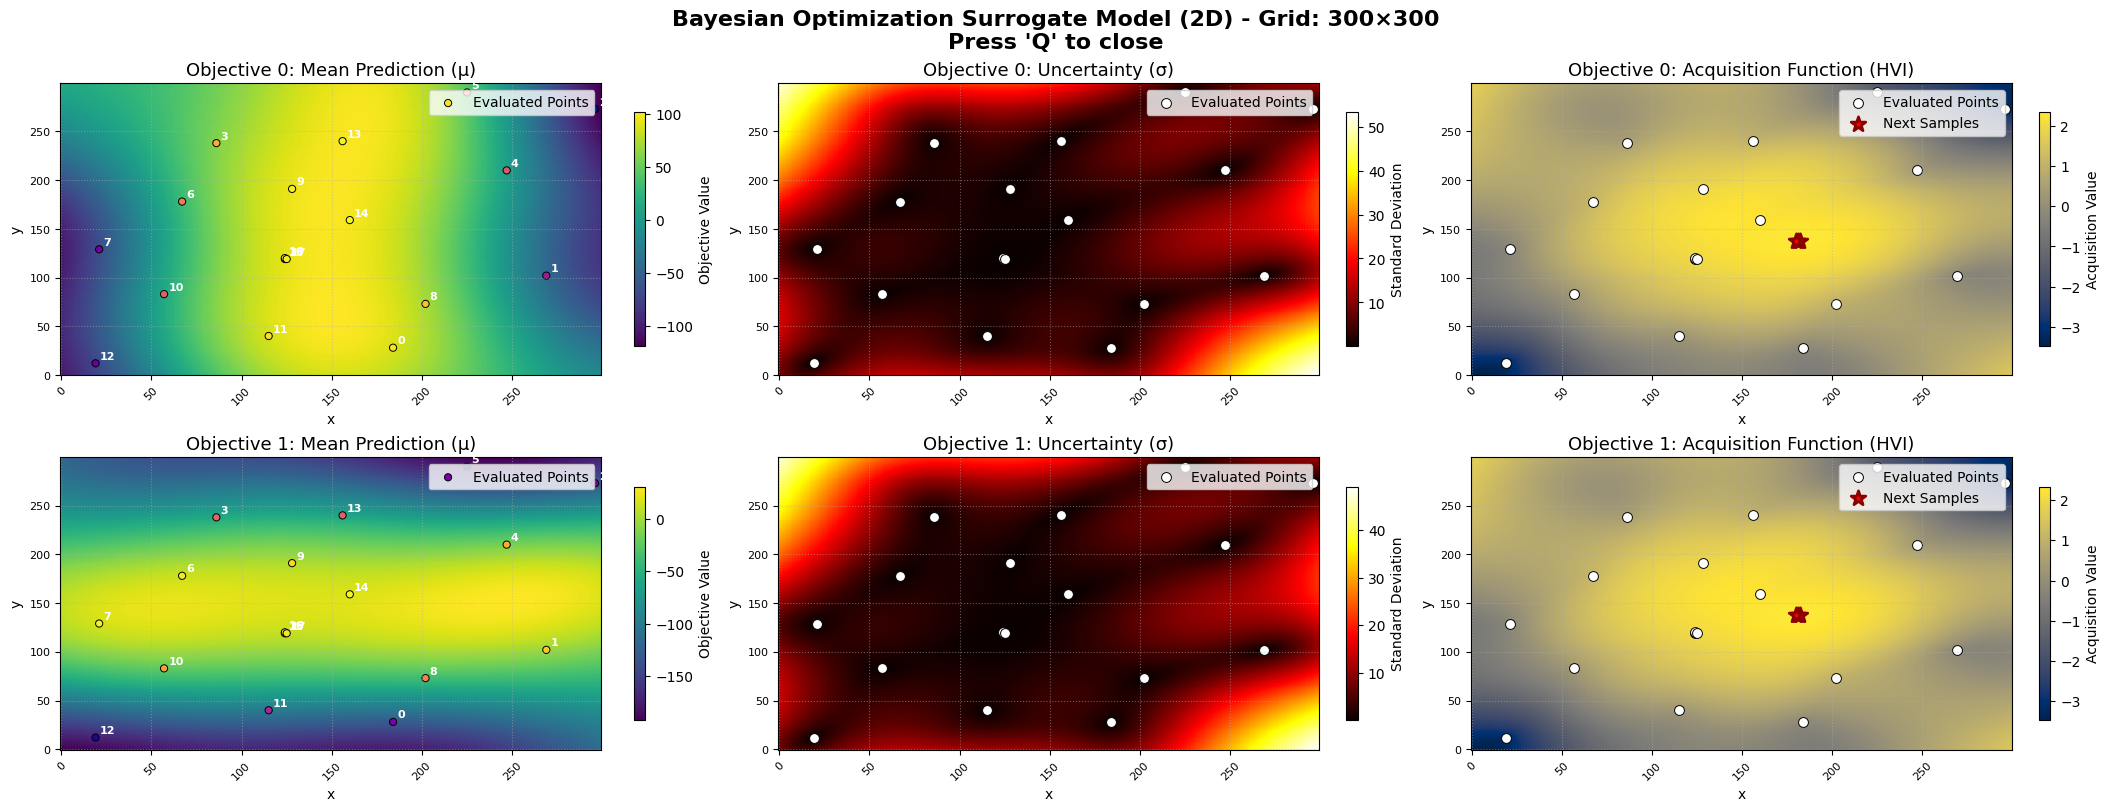

🔍 Debug: Evaluating point [181 138] | Objectives = [90.39 18.56]
🔍 Debug: Evaluating point [182 138] | Objectives = [89.76 18.56]
🔍 Debug: Evaluating point [180 138] | Objectives = [91.   18.56]
[Iter 18] Hyperparams: 0.0095s | Kernels: 0.0140s | Acquisition: 0.0193s | Eval: 0.7993s | TOTAL: 0.8421s

🔄 Debug: Starting iteration 21, n_evaluations=21
🔄 Debug: Optimized hyperparameters: [  88.76   90.4  4635.4  4336.5 ]
🔍 Debug: Selected next batch:
 - [148 150]
 - [148 151]
 - [147 150]


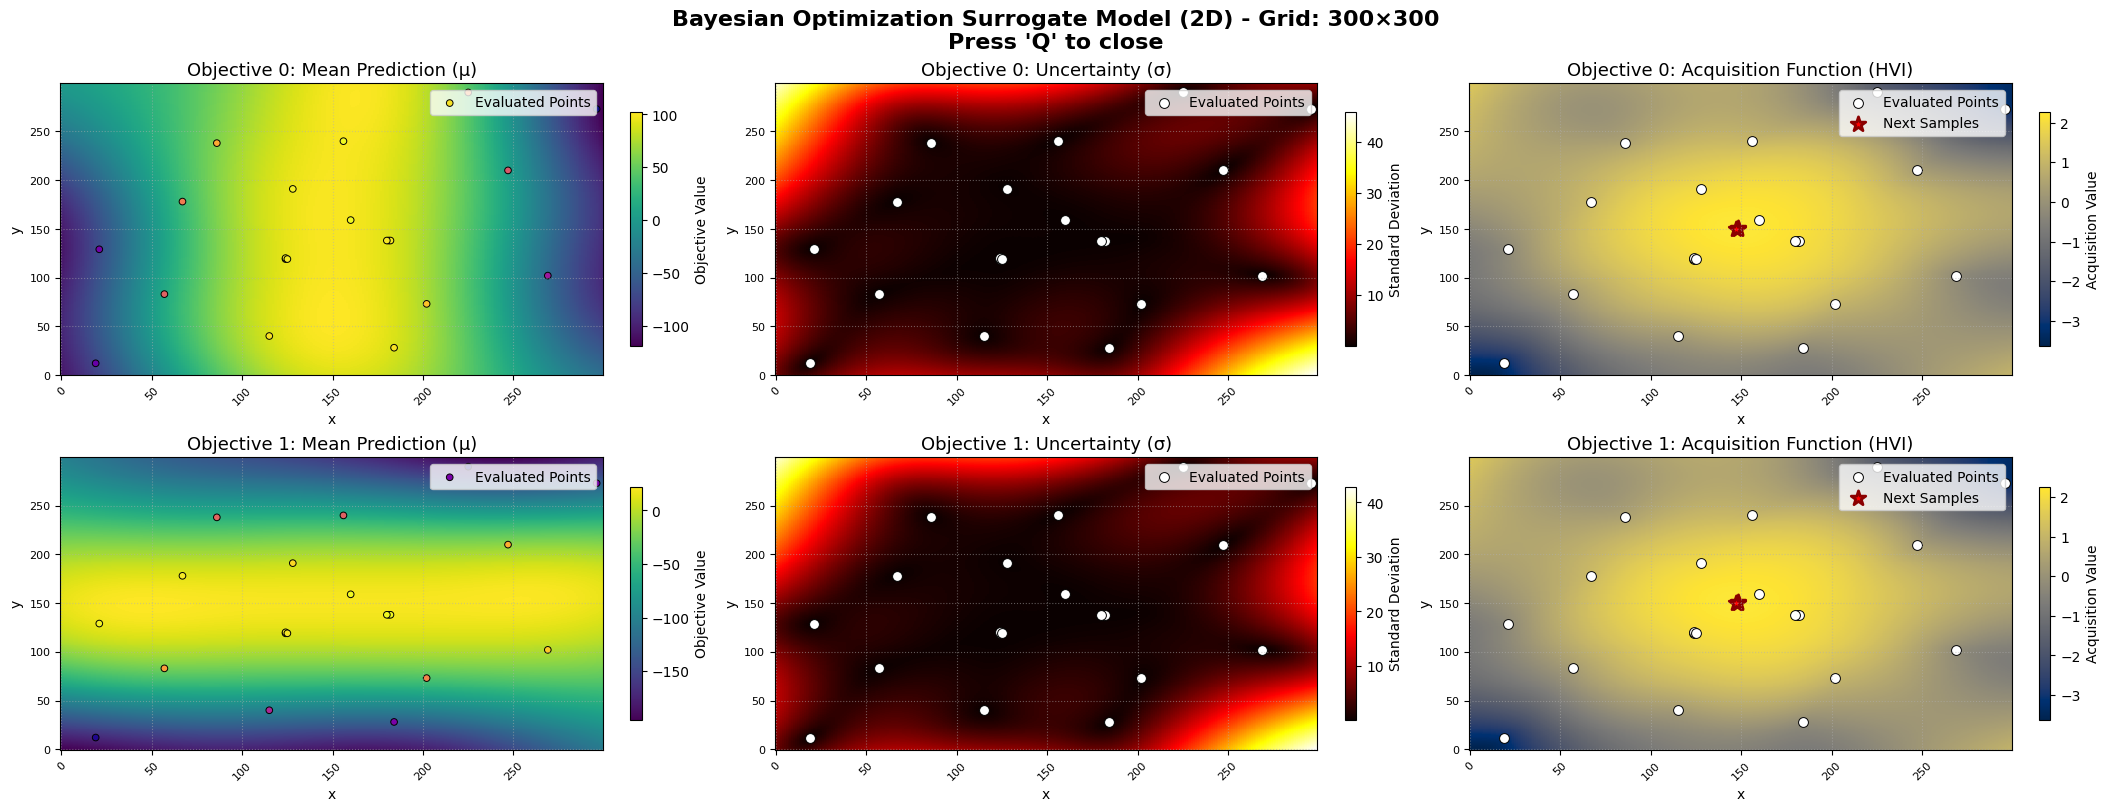

🔍 Debug: Evaluating point [148 150] | Objectives = [99.96 20.  ]
🔍 Debug: Evaluating point [148 151] | Objectives = [99.96 19.99]
🔍 Debug: Evaluating point [147 150] | Objectives = [99.91 20.  ]
[Iter 21] Hyperparams: 0.0131s | Kernels: 0.0156s | Acquisition: 0.0340s | Eval: 0.7445s | TOTAL: 0.8073s

🔄 Debug: Starting iteration 24, n_evaluations=24
🔄 Debug: Optimized hyperparameters: [  92.23   92.21 4635.69 4336.96]
🔍 Debug: Selected next batch:
 - [150 148]
 - [151 151]
 - [150 152]


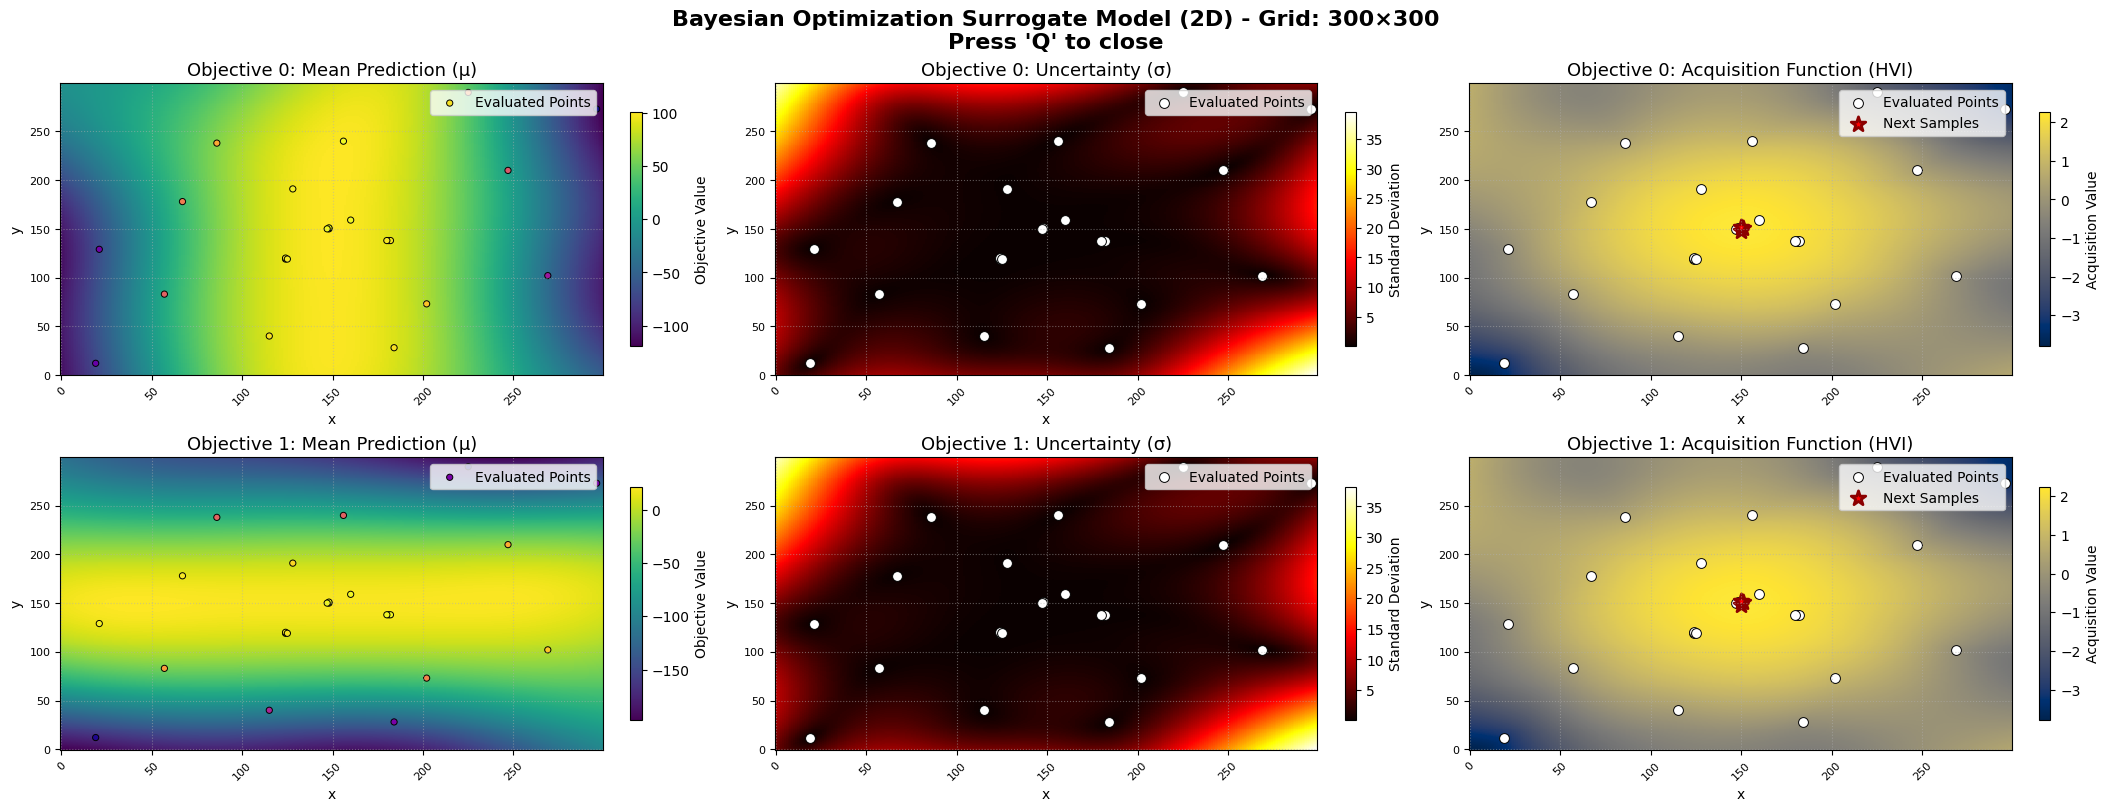

🔍 Debug: Evaluating point [150 148] | Objectives = [100.    19.96]
🔍 Debug: Evaluating point [151 151] | Objectives = [99.99 19.99]
🔍 Debug: Evaluating point [150 152] | Objectives = [100.    19.96]
[Iter 24] Hyperparams: 0.0144s | Kernels: 0.0170s | Acquisition: 0.0257s | Eval: 0.7498s | TOTAL: 0.8068s

🔄 Debug: Starting iteration 27, n_evaluations=27
🔄 Debug: Optimized hyperparameters: [  91.81   92.63 4636.46 4335.84]
🔍 Debug: Selected next batch:
 - [149 149]
 - [150 150]
 - [149 150]


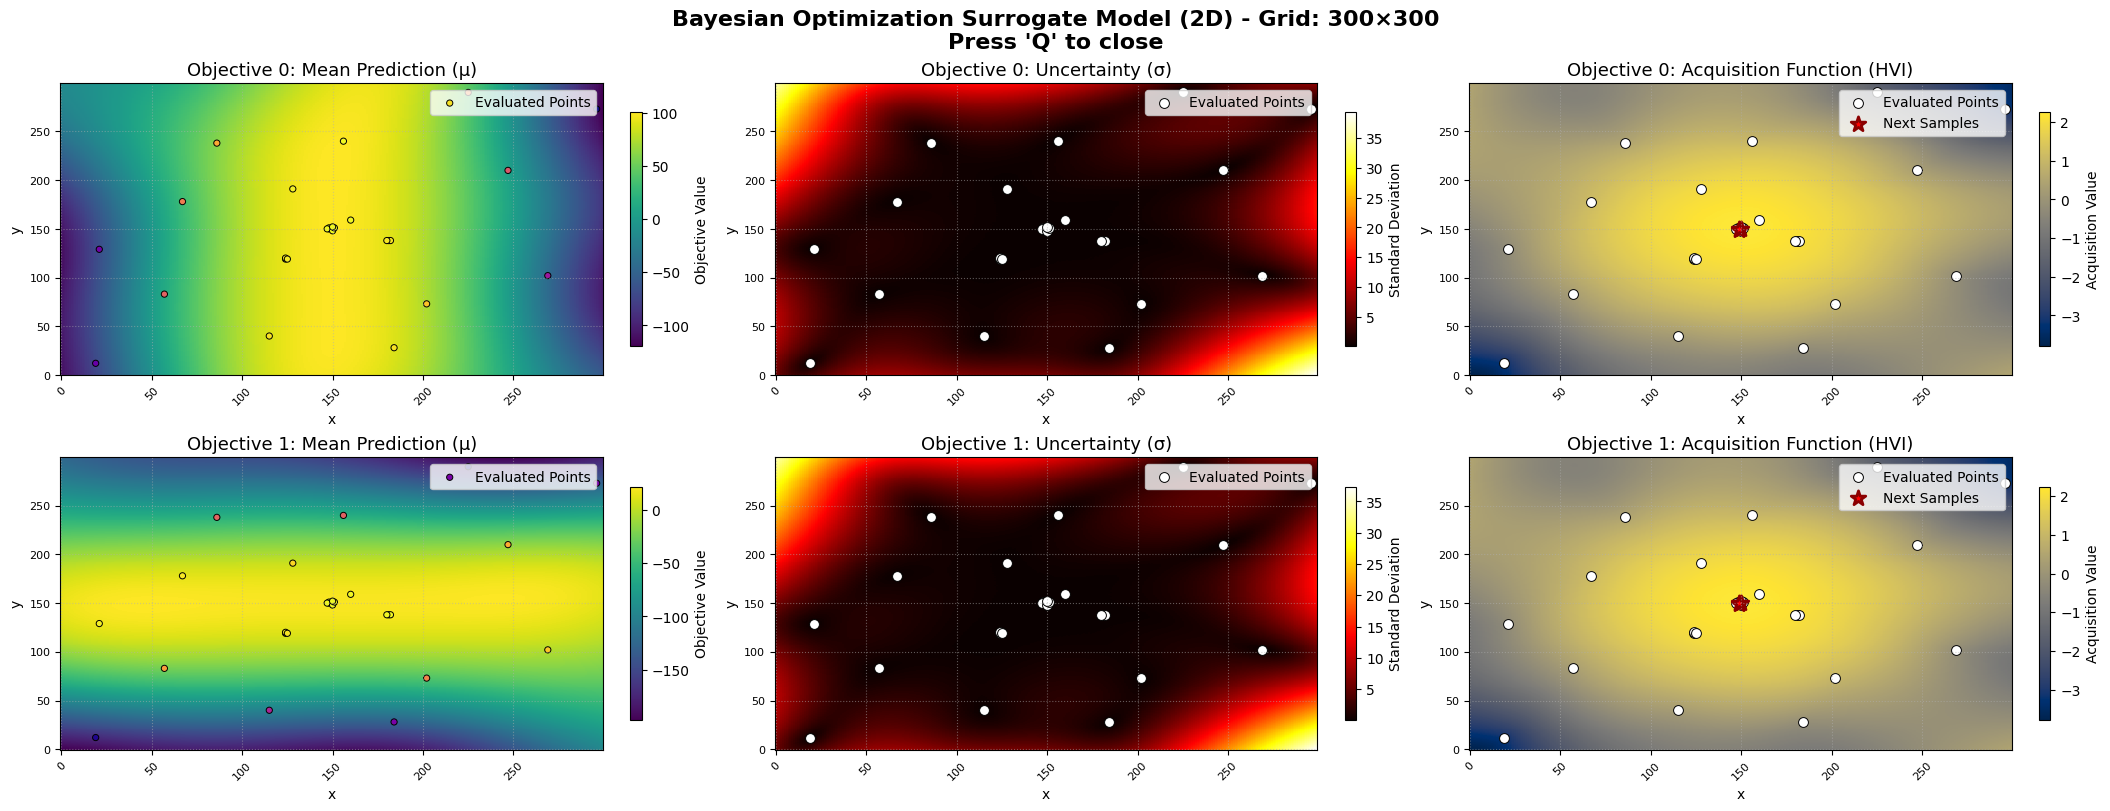

🔍 Debug: Evaluating point [149 149] | Objectives = [99.99 19.99]
🔍 Debug: Evaluating point [150 150] | Objectives = [100.  20.]
🔍 Debug: Evaluating point [149 150] | Objectives = [99.99 20.  ]
[Iter 27] Hyperparams: 0.0083s | Kernels: 0.0242s | Acquisition: 0.0285s | Eval: 0.7716s | TOTAL: 0.8326s

🎉 Optimization completed in 4.13 seconds.


In [9]:
# Run the optimization
start_time = time.time()
print("🚀 Starting optimization...\n")

optimizer.optimize()

end_time = time.time()
print(f"\n🎉 Optimization completed in {end_time - start_time:.2f} seconds.")

### Analyze Results

In [10]:
# Perform Pareto analysis
pareto_points = optimizer.pareto_analysis()

print(f"\nFound {len(pareto_points)} Pareto-optimal points")

📊 Pareto Analysis Results:
Input: [148. 150.], Pareto Point 1: [99.96 20.  ]
Input: [150. 148.], Pareto Point 2: [100.    19.96]
Input: [151. 151.], Pareto Point 3: [99.99 19.99]
Input: [150. 152.], Pareto Point 4: [100.    19.96]
Input: [149. 149.], Pareto Point 5: [99.99 19.99]

Found 5 Pareto-optimal points


## Visualization & Analysis

### Understanding the Heatmap Plots

When you run the 2D optimization, you'll see heatmap plots with three panels per objective:

1. **Mean Prediction (μ)**: Shows the GP's prediction of objective values
2. **Uncertainty (σ)**: Shows where the GP is uncertain (high variance)
3. **Acquisition Function**: Shows where the optimizer will sample next

### Plot Interpretation:
- **Dark blue areas** in mean plots indicate low predicted values
- **Bright yellow areas** in mean plots indicate high predicted values
- **Red areas** in uncertainty plots show high uncertainty
- **White circles** show evaluated points
- **Red stars** show next points to evaluate

## Performance Tips

### Choosing Parameters

#### Initial Samples
- **Rule of thumb**: 5-10 samples per dimension
- **More samples**: Better initial model, slower startup
- **Fewer samples**: Faster startup, more exploration needed

#### Batch Size
- **Larger batches**: Better parallelization, less adaptive
- **Smaller batches**: More adaptive, sequential evaluation
- **Sweet spot**: 2-5 points per batch

#### Beta Values (Exploration)
- **Higher β**: More exploration, slower convergence
- **Lower β**: More exploitation, faster convergence
- **Typical range**: 1.0 - 3.0

### Memory and Computation Scaling

The algorithm's complexity scales as:
- **Memory**: O(n² · m) where n = evaluations, m = objectives
- **Computation**: O(n³ · m) due to matrix inversion

**Practical limits**:
- Up to ~100-200 evaluations: Excellent performance
- 200-500 evaluations: Good performance
- 500+ evaluations: Consider reducing `n_iterations` or `batch_size`

## Summary

This tutorial covered:

✅ **Theory**: Gaussian Processes and multi-objective optimization  
✅ **Implementation**: High-performance Numba-accelerated code  
✅ **Usage**: From basic to advanced configurations  
✅ **Visualization**: Understanding heatmaps and Pareto analysis  
✅ **Performance**: Tuning parameters for optimal results  

### Key Takeaways:
1. **Start simple**: Use default parameters first
2. **Understand trade-offs**: Balance exploration vs exploitation
3. **Monitor performance**: Watch convergence and Pareto fronts
4. **Scale appropriately**: Consider memory limits for large problems

Happy optimizing! 🚀